# Basic Practice
- Before training a model, there are some essential steps that needs to be done :
  - Feature engineering 
  - Learning Algorithm Selection 
  - Splitting of dataset
- Handling Underfitting and Overfitting
- Model preformance assessment
- Hyperparameter tuning 


---


# 1. Feature Engineering

- Transforming **raw data** into **datasets** that contain feature vectors which are usable by ML algorithms.
- **Dataset** = labeled examples $(x_i, y_i)$ where each $x_i$ is a vector of features $(x^{(1)}, x^{(2)}, ..., x^{(D)})$
- Requires:
  - Creativity
  - Domain knowledge

- **Informative features** = high **predictive power**

## One-Hot Encoding

- Used to convert **Categorical** features into **Binary vectors**

- Used when the values of the a particular features don't have an order among themselves.

- Example: Feature = “Color”  
  - red → [1, 0, 0]  
  - yellow → [0, 1, 0]  
  - green → [0, 0, 1]

- Don't use red=1, yellow=2, green=3 → introduces **false ordering**

## Binning (Bucketing)

- Converts **numerical** features into **categorical** ones (bins)

- Helps when **exact values** aren't important, only the **range** matters

- Example: Age   
  - 0–5 → bin1  
  - 6–10 → bin2  
  - 11–15 → bin3

## Normalization

- Rescales numerical features to a standard range [0, 1] or [−1, 1]
- Formula:  
  $$
  \bar{x}^{(j)} = \frac{x^{(j)} - \min^{(j)}}{\max^{(j)} - \min^{(j)}}
  $$

- Benefits:
  - Increased speed of learning. Eg. - Faster gradient descent convergence.
  - Removes scale bias  
  - Avoids **numerical overflow**

## Standardization

- Rescales features to have:
  - Mean (μ) = 0  
  - Standard deviation (σ) = 1  

- Formula:  
  $$
  \hat{x}^{(j)} = \frac{x^{(j)} - \mu^{(j)}}{\sigma^{(j)}}
  $$

- Good for:
  - Outliers  
  - Normally distributed data

## Normalization vs. Standardization

**Use Standardization When:**
- Feature has outliers  
- Follows a normal distribution  
  

**Use Normalization When:**
- Feature has known fixed range  
- No extreme values (may cause distortion of min and max) 
- Faster training required

## Dealing with Missing Features

- Missing values are common in real-world datasets.
- **Causes:**
  - Manual data entry errors  
  - Unavailable measurements  

- **Solutions:**
    - Drop incomplete rows  
    - Use robust ML algorithms that can deal with missing feature values 
    - Apply **data imputation techniques**

## Data Imputation Techniques

1. **Mean Imputation**  
   Replace missing value with the **average** value of that feature.

2. **Out-of-Range Value**  
   It can learn what is it better to do when the feature has a value significantly different from other values.
   E.g., if range is [0, 1], use 2 or −1. 

3. **Mid-Range Value**  
   Use neutral value like 0 in range [−1, 1]. Such values won't affect predictions much.

4. **Regression Imputation**  
   - Predict missing value using other features  
   - Train model using complete rows

5. **Binary Indicator Method**  
   - Add a binary feature:  
     `1` = value present, `0` = missing  
   - Replace missing value with 0 or other value

### Choosing the Right Imputation Technique

- No universal best method  
- Try multiple approaches and compare results

 Use the **same technique** for training and prediction

---



# 2. Learning Algorithm Selection 

- Choosing a machine learning algorithm is hard.
- We could try them all and choose the one that predicts the best — but time is limited.
- But some criterias can narrow our options.

## Explainability

- Does the model need to be easy to explain?
    - **Black-box models**: neural networks, ensembles  
        - High accuracy  
        - Hard to explain
    - **Transparent models**: kNN, linear regression, decision trees  
        - Easy to interpret  
        - May lose some accuracy

## In-memory vs. Out-of-memory

- Can the dataset fit in **RAM** ?
  - Yes → Use any algorithm
  - No → Use **incremental learning** (updates model gradually)

## Number of Features and Examples

- How **large** is the dataset?
    - Handles large data:
        - Neural networks (discussed later)  
        - Gradient boosting (discussed later)
    - Struggles with scale:
        - SVM (especially with many features)

## Data Types: Categorical vs Numerical

- What kind of features does the data have?
  - Categorical  
  - Numerical  
  - Mixed
- Some algorithms need categorical data converted into numerical data (e.g., one-hot encoding)

## Linearity of the Data

- Is the data **linearly separable**?
  -  Yes:
        - Logistic regression  
        - Linear regression  
        - Linear SVM
  -  No:
        - Neural networks  
        - Ensemble models (e.g., Random Forests)

## Training Speed

- How fast should training be?
    -  Fast:
        - Logistic/linear regression  
        - Decision trees
    -  Slow:
        - Neural networks
-  Can be improved by using:
    - Optimized libraries  
    - Multi-core CPUs for faster training

## Prediction Speed

- How fast does the model need to **predict**?
    -  Fast:
        - Linear/logistic regression  
        - SVM  
        - Small neural networks
    -  Slower:
        - kNN  
        - Deep/recurrent nets  
        - Ensembles


---

# 3. Splitting of dataset

- In practice, ML datasets are split into:

    1. **Training set**  
    2. **Validation set**  
    3. **Test set**

- **Training set**: largest, used to build the model  
- **Validation + Test sets**: smaller, used to evaluate  
- These two are called **hold-out sets**

## Why Three Sets

- **Training**: fit the model  
- **Validation**:  
  - Select best algorithm  
  - Tune hyperparameters  
- **Test**:  
  - Final evaluation before deployment

## Typical Data Splits

- Old rule of thumb:
    - 70% training  
    - 15% validation  
    - 15% test

- Big data setups:
    - 95% training  
    - 2.5% validation  
    - 2.5% test

---

# 4. Underfitting & Overfitting

## Underfitting  

A model **underfits** if it performs poorly on training data.  
    This means it has **high bias**.

- **Causes:**
    - Model too simple (e.g. linear regression)
    - Weak or irrelevant features

### Example

<img src="Images/Underfitting_5.png" width=500> 
<img src="Images/Good fit_5.png" width=500>


### Fixes:
- Use more complex model  
- Engineer better features

## Overfitting

A model **overfits** if it performs well on training data but poorly on validation/test data.

- **Causes:**
    - Model too complex (deep net, large tree)
    - Too many features, too little data

- **Solutions:**

    1. Try simpler models 
    2. Reduce feature dimensions
    3. Add more training data 
    4. Apply **regularization**  

<img src="Images/Overfitting_5.png" width=500> 
<img src="Images/Good%20fit_5.png" width=500>


---

# Regularization

Used to avoid making too complex model that leads to overfitting.
- Penalizes model complexity  
- Reduces **variance**, might increase **bias**

This is the **bias-variance trade-off**

## L1 and L2 Regularization

### L1 Regularization (Lasso):
- Promotes **sparsity**
- Helps in feature selection

Eg. - **Linear regression (without Regularization):**
$$ \frac{1}{N} \sum (f_{w,b}(x_i) - y_i)^2 $$

**With L1 Regularization:**
$$ C \cdot 
|w| + \frac{1}{N} \sum (f_{w,b}(x_i) - y_i)^2 $$

### L2 Regularization (Ridge):
- Keeps weights **small**
- Smooths the model
- Differentiable

**Linear Regression (with L2 Regularization)**:
$$ C \cdot \|w\|^2 + \frac{1}{N} \sum (f_{w,b}(x_i) - y_i)^2 $$

## Elastic net regularization
- **Elastic Net** = L1 + L2  

(Discussed later) ; -
## Dropout & Batch normalization
Neural networks regularize using this.

## Other techniques:
- Data augmentation  
- Early stopping

---

# Model Performance Assessment

Once the learning algorithm builds a model using the training set, how do we know if it's good?

Use the **test set** to assess generalization performance.


# For Regression model

- A good regression model produces predicted values close to actual values.
- Compare it to a **mean model**, which always predicts the average label. The fit of model should be better than fit of mean model. 
- Use **Mean Squared Error (MSE)** on:
  - Training data
  - Test data

    **If test MSE >> training MSE → Overfitting!**

    Try **regularization** or **better hyperparameter tuning**.

# Model Assessment - for Classification model

More complex than regression. Common metrics include:

- Confusion Matrix
- Accuracy
- Cost-sensitive Accuracy
- Precision / Recall
- Area under ROC Curve (AUC)

## Confusion Matrix

A table comparing **predicted** vs. **actual class labels**.

Eg.,  
<img src="Images/Confusion matrix_5.png" width=500>

where :
 **TP** = True Positives, **FN** =  False Negative, 
**FP** =  False Positives, **TN** = True Negatives

**Used for:**
- Analyzing error patterns
- Computing metrics: **Precision**, **Recall**

### Precision / Recall

- **Precision** = $\frac{TP}{(TP + FP)}$ 

    How many predicted positives are actually correct?

- **Recall** = $\frac{TP}{(TP + FN)}$

    How many actual positives were correctly predicted?

**Trade-off:**
- High precision → fewer false positives → May lead to lower recall
- High recall → fewer false negatives → May lead to lower precision

### Adjusting Precision vs Recall

Ways to shift the balance:

- **Weighting classes** (e.g., SVM supports class weights)
- **Tuning hyperparameters**
- **Changing decision threshold**  
  (e.g., predict positive if probability > 0.9)

### Precision/Recall in Multiclass

- Pick a class → treat it as **positive**
- Others → treated as **negative**
- Now use binary precision/recall formulas

## Accuracy

**Accuracy** = $\frac{TP}{(TP + TN + FP + FN)}$

- Useful when **all class errors are equally important** . 

 Eg, - In spam detection, false positives are worse than false negatives!

## Cost-Sensitive Accuracy

Account for **importance of different mistakes**:

- Assign **costs** to FP and FN
- Multiply FP and FN counts by respective costs
- Plug into accuracy formula

Useful when misclassification costs differ (e.g., in healthcare or fraud detection).

## Area under ROC Curve 

**ROC = Receiver Operating Characteristic**

Measures performance using:

- TPR = $\frac{TP}{(TP + FN)}$  
- FPR = $\frac{FP}{(FP + TN)}$

### Drawing ROC Curve

**Steps:**

1. Discretize confidence scores (e.g., 0.0 to 1.0)
2. For each threshold:
   - Predict positive if score ≥ threshold
   - Compute TPR and FPR
3. Plot **TPR vs FPR** for different thresholds.

## AUC (Area Under Curve)

- AUC = 1 → Perfect classifier
- AUC = 0.5 → Random guessing
- AUC < 0.5 → Model is flawed

Goal: Maximize TPR while keeping FPR low

<img src="Images/ROC%20Curve%20_5.png" width=500>

---

# Hyperparameter Tuning

**Hyperparameters** : Parameters **not learned** by the model but given by the user.  

Examples:  
- Depth of tree (ID3)
- C in SVM
- Learning rate in gradient descent

Needs to be **tuned** manually (or with automation).

## Ways of tuning :-

### Grid Search

Simple brute-force tuning:

1. Define a **set of possible values** for each hyperparameter.
2. Try **all combinations**.
3. Train models and evaluate performance on **validation set**.
4. Choose the best one.

**For example :-**

For SVM with:

- C ∈ [0.001, 0.01, ..., 1000]
- Kernel ∈ {linear, rbf}

You try all 14 combinations like:

(0.01, "linear"), (0.01, "rbf"), ...

Train each → evaluate → pick the best.

### Smarter Alternatives

- **Random Search**: Randomly sample from distributions of hyperparameters.
- **Bayesian Optimization**: Use past results to inform next combinations.
- **Gradient-Based** or **Evolutionary Algorithms**

There are also hyperparameter tuning libraries that can help in tuning. 

---

# Cross-Validation

Used when we **don’t have a separate validation set**. But 

- Still want to tune hyperparameters  
- Still want to estimate model performance reliably

**Steps:**

1. Split training set into k subsets of same size. 
Each subset is called ***fold***
2. Train on (k-1) *folds*, validate on 1 *fold*
3. Repeat k times, each time using a different *fold* for validation
4. **Average metric** over all *folds*

## Cross-Validation + Grid Search

- Combine **grid/random/Bayesian search** with **cross-validation**
- Choose best hyperparameters
- Retrain using entire training set with selected hyperparameters
- Evaluate on **test set**


# Applying the concepts learned so far on a dataset from Kaggle
## Dataset - StudentsPerformace

In [ ]:
# STUDENT PERFORMANCE ANALYSIS AND MODELING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)


# 1. Load the Dataset
df = pd.read_csv("StudentsPerformance.csv")
print("Dataset preview:\n", df.head())

# 2. Feature Engineering

# A. One-Hot Encoding for Categorical Features
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# B. Binning: Convert 'math score' into categories (low, medium, high)
df['math_level'] = pd.cut(df['math score'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])

# C. Target column (Regression: Predict math score)
y = df['math score']

# D. Numerical Features
numerical_cols = ['reading score', 'writing score']

# Simulate Missing Value for illustration
df.loc[0, 'writing score'] = np.nan

# E. Preprocessing Pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),    # Fill missing values with mean
    ("scaler", StandardScaler()),                   # Standardization
    ("minmax", MinMaxScaler())                       # Normalization
])

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(drop='first'))
])

# Combine both
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

# Final feature matrix
X = df[categorical_cols + numerical_cols]


# 3. Dataset Splitting: 70/15/15 split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42)  # ~15% val


# 4. Baseline Linear Regression Model
model_lr = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
model_lr.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = model_lr.predict(X_train)
y_val_pred = model_lr.predict(X_val)

print("\n[Linear Regression]")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))


# 5. Overfitting vs Underfitting
# Decision Tree without depth limit (can overfit)
model_tree = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=0))
])
model_tree.fit(X_train, y_train)
print("\n[Decision Tree]")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, model_tree.predict(X_train))))
print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, model_tree.predict(X_val))))


# 6. Regularization Techniques

from sklearn.model_selection import GridSearchCV

def tune_and_evaluate_regressor(name, model, param_grid):
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    grid = GridSearchCV(pipe, param_grid, scoring='neg_root_mean_squared_error', cv=5)
    grid.fit(X_train, y_train)
    
    print(f"\n[{name}]")
    print("Best Hyperparameters:", grid.best_params_)
    print("Best CV RMSE:", -grid.best_score_)
    
    y_val_pred = grid.predict(X_val)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print("Validation RMSE with best model:", val_rmse)
    return grid.best_estimator_

# Ridge Regression tuning
ridge_params = {'regressor__alpha': [0.01, 0.1, 1, 10, 100]}
best_ridge = tune_and_evaluate_regressor("Ridge", Ridge(), ridge_params)

# Lasso Regression tuning
lasso_params = {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10]}
best_lasso = tune_and_evaluate_regressor("Lasso", Lasso(max_iter=10000), lasso_params)

# ElasticNet Regression tuning
elasticnet_params = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
    'regressor__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}
best_elasticnet = tune_and_evaluate_regressor("ElasticNet", ElasticNet(max_iter=10000), elasticnet_params)


Dataset preview:
    gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0  female        group B           bachelor's degree      standard                    none          72             72             74
1  female        group C                some college      standard               completed          69             90             88
2  female        group B             master's degree      standard                    none          90             95             93
3    male        group A          associate's degree  free/reduced                    none          47             57             44
4    male        group C                some college      standard                    none          76             78             75

[Linear Regression]
Train RMSE: 5.410244304353282
Validation RMSE: 5.144218257180311

[Decision Tree]
Train RMSE: 0.2672612419124244
Validation RMSE: 9.209053516331995

[Ridge]
Best H


[Classification Report]
              precision    recall  f1-score   support

           0       0.64      0.67      0.65        27
           1       0.95      0.94      0.94       173

    accuracy                           0.91       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.91      0.91      0.91       200



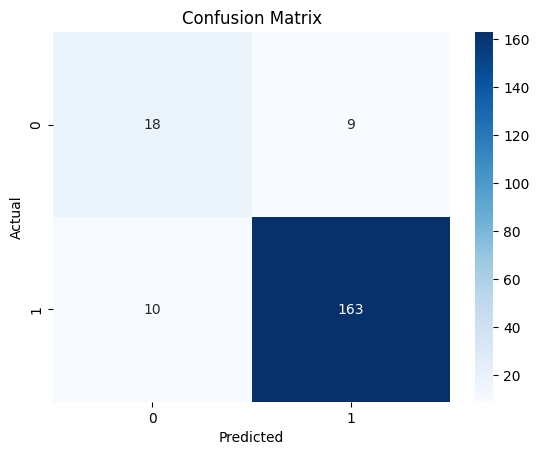

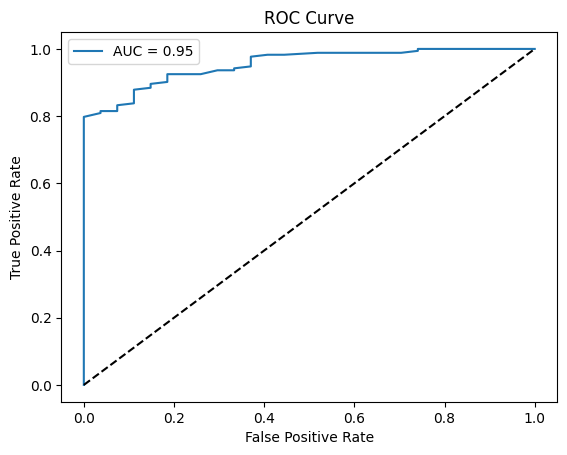


[Best Hyperparameters]
{'regressor__max_depth': 7, 'regressor__min_samples_split': 10}
Best CV RMSE: 7.106748685366757
Validation RMSE with best model: 7.455760263198391


In [ ]:


# 7. Model Performance (Classification)
# Convert math scores into binary class (pass if score >= 50)
df['pass_math'] = (df['math score'] >= 50).astype(int)

# Rebuild X, y for classification
y_cls = df['pass_math']
X_cls = df[categorical_cols + numerical_cols].copy()

# Impute missing values for classification features
X_cls['writing score'] = X_cls['writing score'].fillna(X_cls['writing score'].mean())

# Train-test split classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=0)

# Classification model: Random Forest
clf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=0))
])
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)

# Classification Report
print("\n[Classification Report]")
print(classification_report(y_test_cls, y_pred_cls))

# Confusion Matrix plot
cm = confusion_matrix(y_test_cls, y_pred_cls)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. ROC Curve & AUC
y_probs = clf.predict_proba(X_test_cls)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cls, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_cls, y_probs):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 9. Hyperparameter Tuning: Decision Tree Regressor

param_grid = {
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_samples_split': [2, 5, 10]
}

pipe_dt = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

grid_search = GridSearchCV(pipe_dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("\n[Best Hyperparameters]")
print(grid_search.best_params_)
print("Best CV RMSE:", np.sqrt(-grid_search.best_score_))

# Evaluate best model on validation set
y_val_pred_grid = grid_search.predict(X_val)
print("Validation RMSE with best model:", np.sqrt(mean_squared_error(y_val, y_val_pred_grid)))


# Model Results Interpretation

---

## Linear Regression

- Train RMSE: 5.41  
- Validation RMSE: 5.14  
- Train and validation errors are close  
- Indicates **good fit** without overfitting or underfitting

---

## Decision Tree

- Train RMSE: 0.27 (very low)  
- Validation RMSE: 9.21 (much higher)  
- Very low train error means **overfitting**  
- Poor generalization on validation data

---

## Regularized Linear Models (Ridge, Lasso, ElasticNet)

- Best alpha ≈ 0.01 (low regularization)  
- CV RMSE ≈ 5.6  
- Validation RMSE ≈ 5.14  
- Slightly higher CV error but similar or better validation error  
- Regularization improves generalization slightly  
- Data likely has a mostly linear relationship

---

## Classification Model

- Accuracy: 91%  
- High precision & recall for passing class (0.94+)  
- Lower for failing class due to class imbalance  
- Model detects passing students well

---

## Tuned Decision Tree (Regression)

- Best params: max_depth=7, min_samples_split=10  
- CV RMSE: 7.11  
- Validation RMSE: 7.46  
- Reduced overfitting compared to untuned tree  
- Still worse than linear models  
- Decision trees less suitable for this dataset
